In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
from google.colab import files
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [14]:
df = pd.read_csv('Mall_Customers (1).csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df = numeric_df.drop('CustomerID', axis=1)
correlation_matrix = numeric_df.corr()
display(correlation_matrix)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

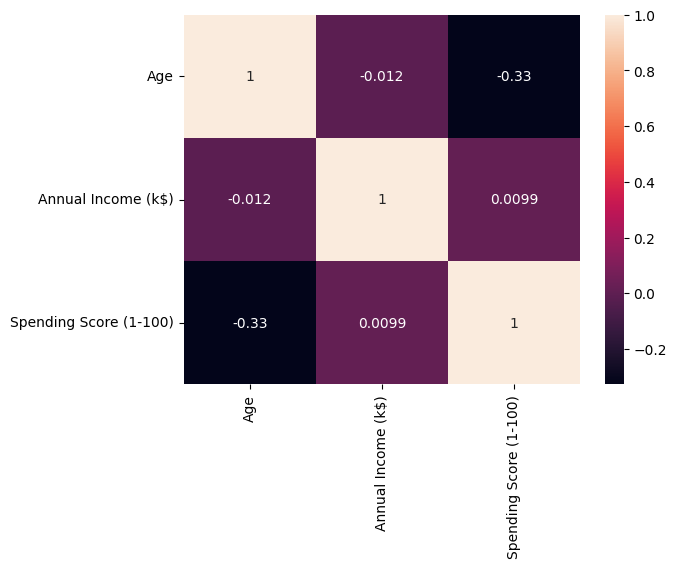

In [ ]:
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
df.isnull().sum()
#there is no special correlations


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


df.select_dtypes(include= 'object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [18]:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [19]:
Final_df= pd.concat([df_num, df_obj], axis=1)

In [20]:
Final_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


<Axes: xlabel='Age', ylabel='Count'>

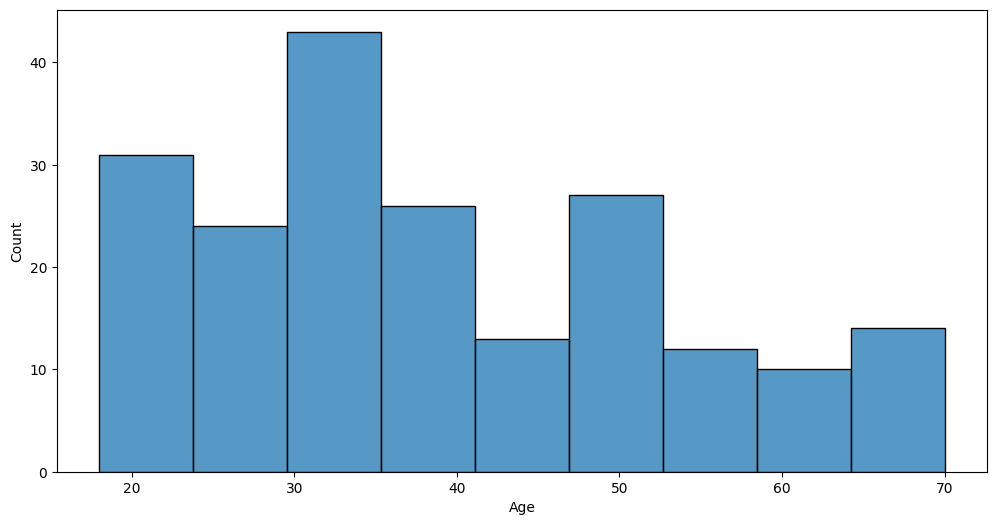

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(data=Final_df, x='Age')

<Axes: xlabel='Gender_Male', ylabel='count'>

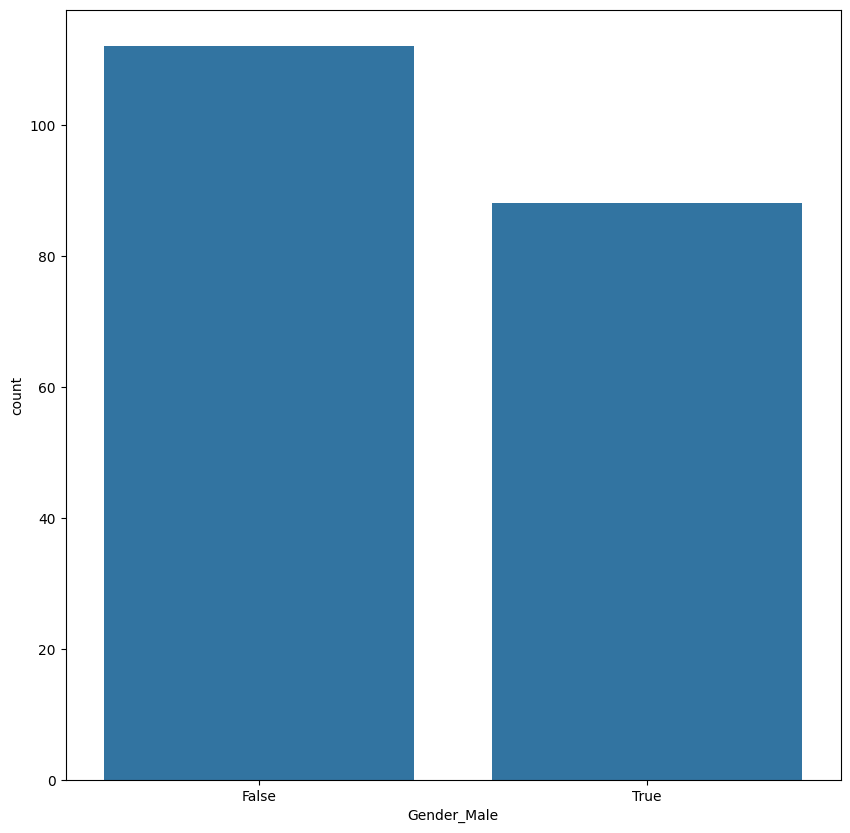

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gender_Male', data=Final_df)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

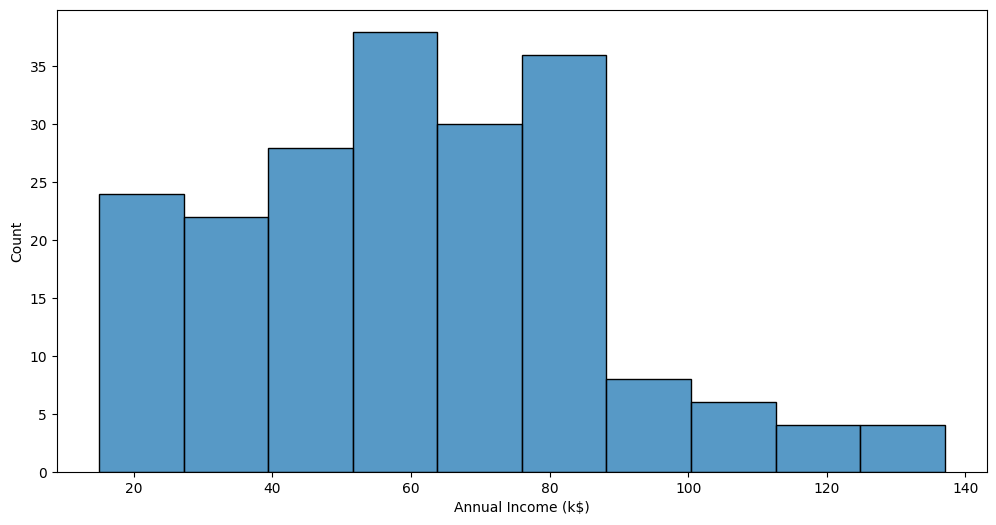

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=Final_df, x='Annual Income (k$)')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

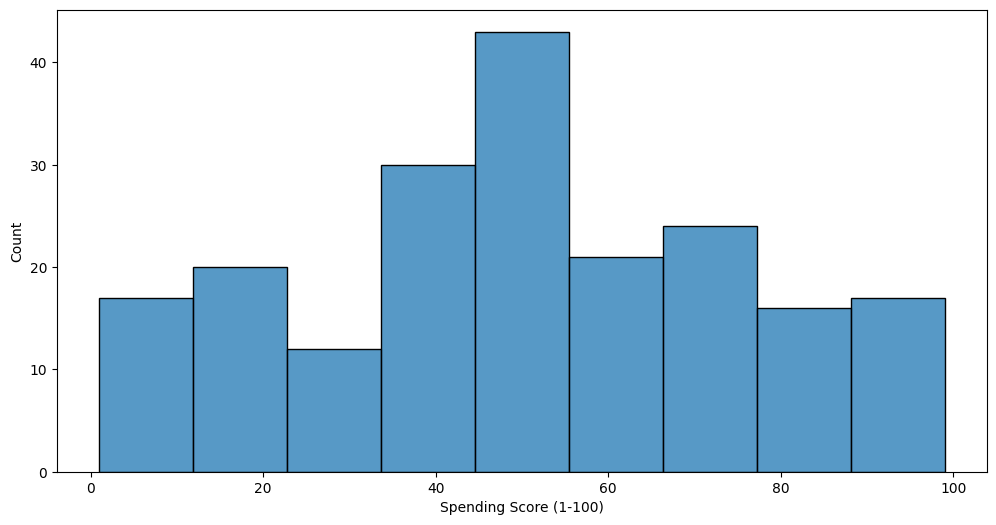

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=Final_df, x='Spending Score (1-100)')

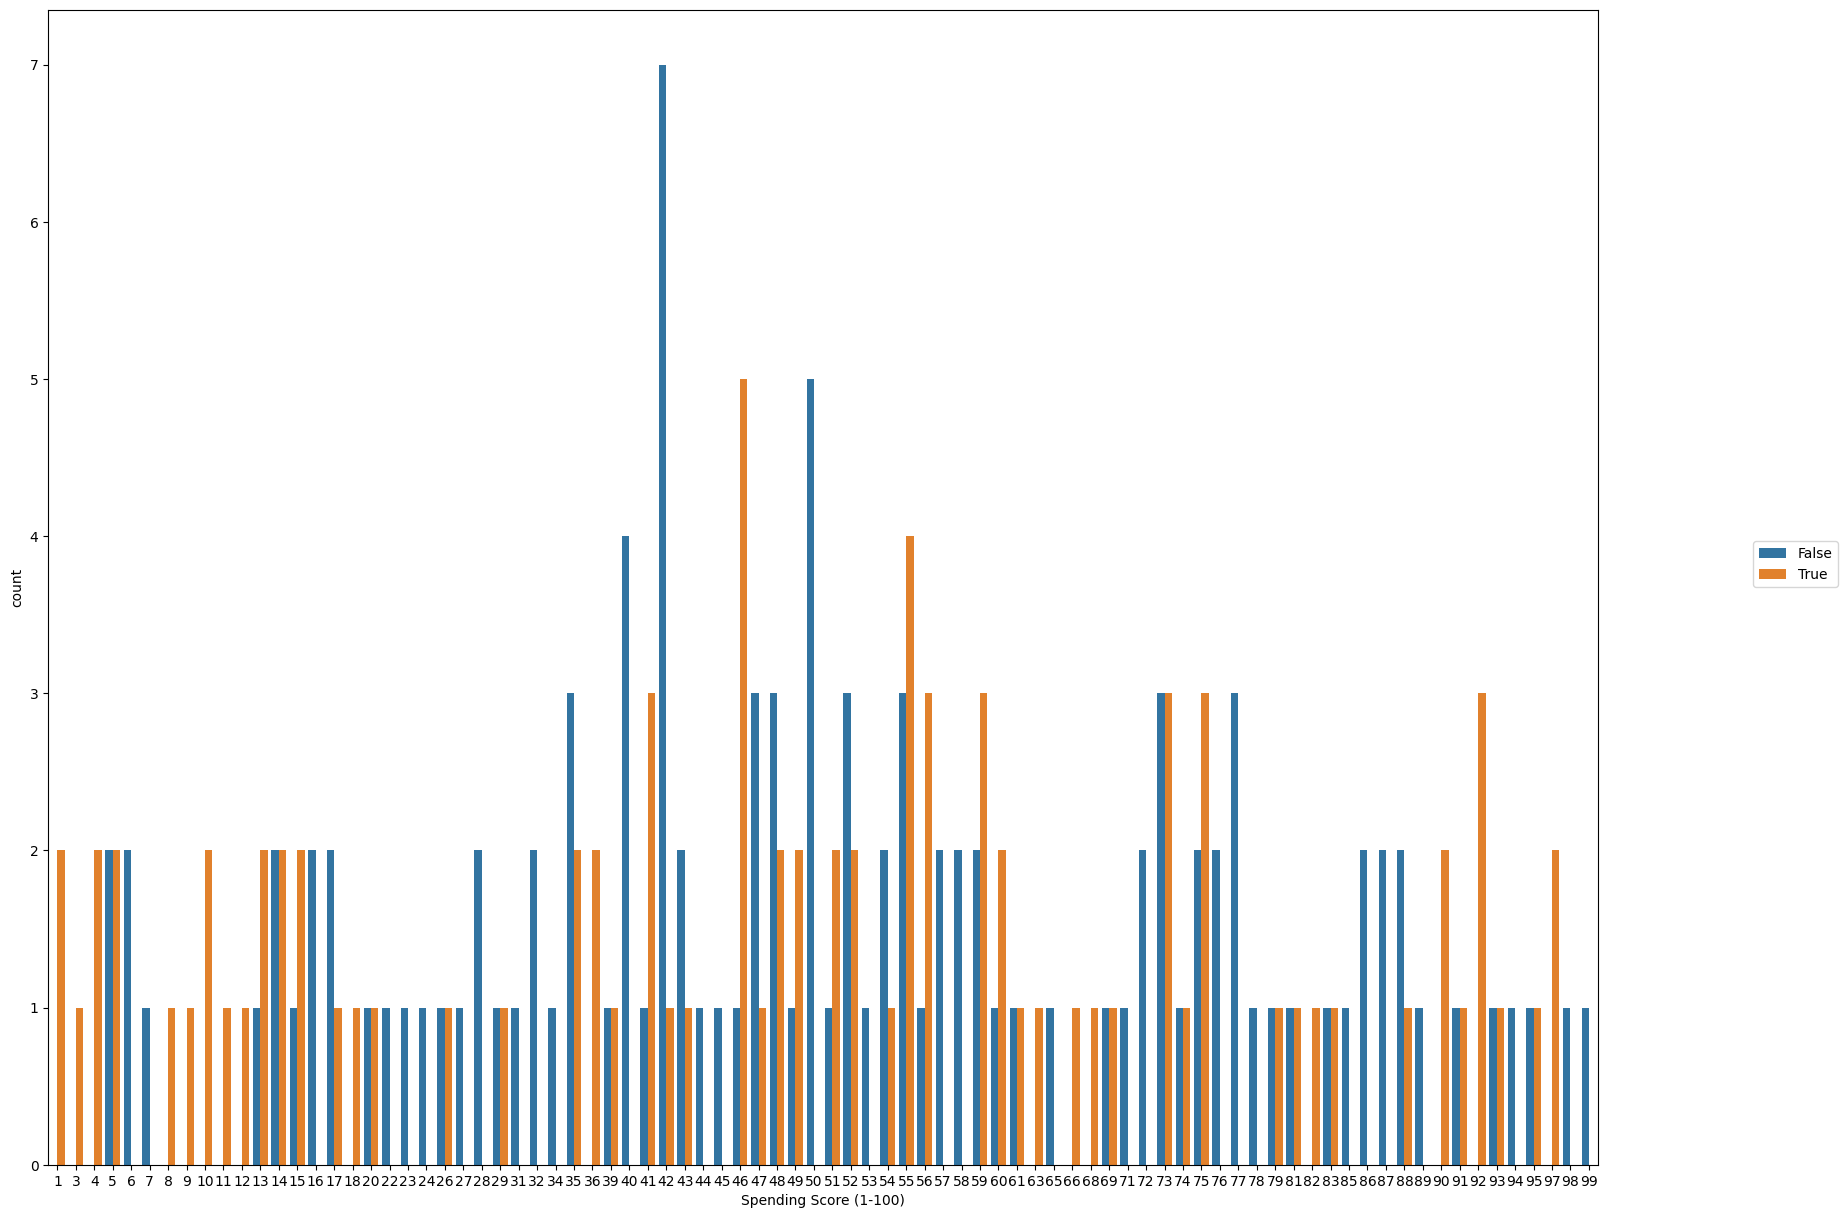

In [25]:
plt.figure(figsize=(20, 15))
sns.countplot(data=Final_df, x='Spending Score (1-100)', hue='Gender_Male' )
plt.legend(loc=(1.1, 0.5))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

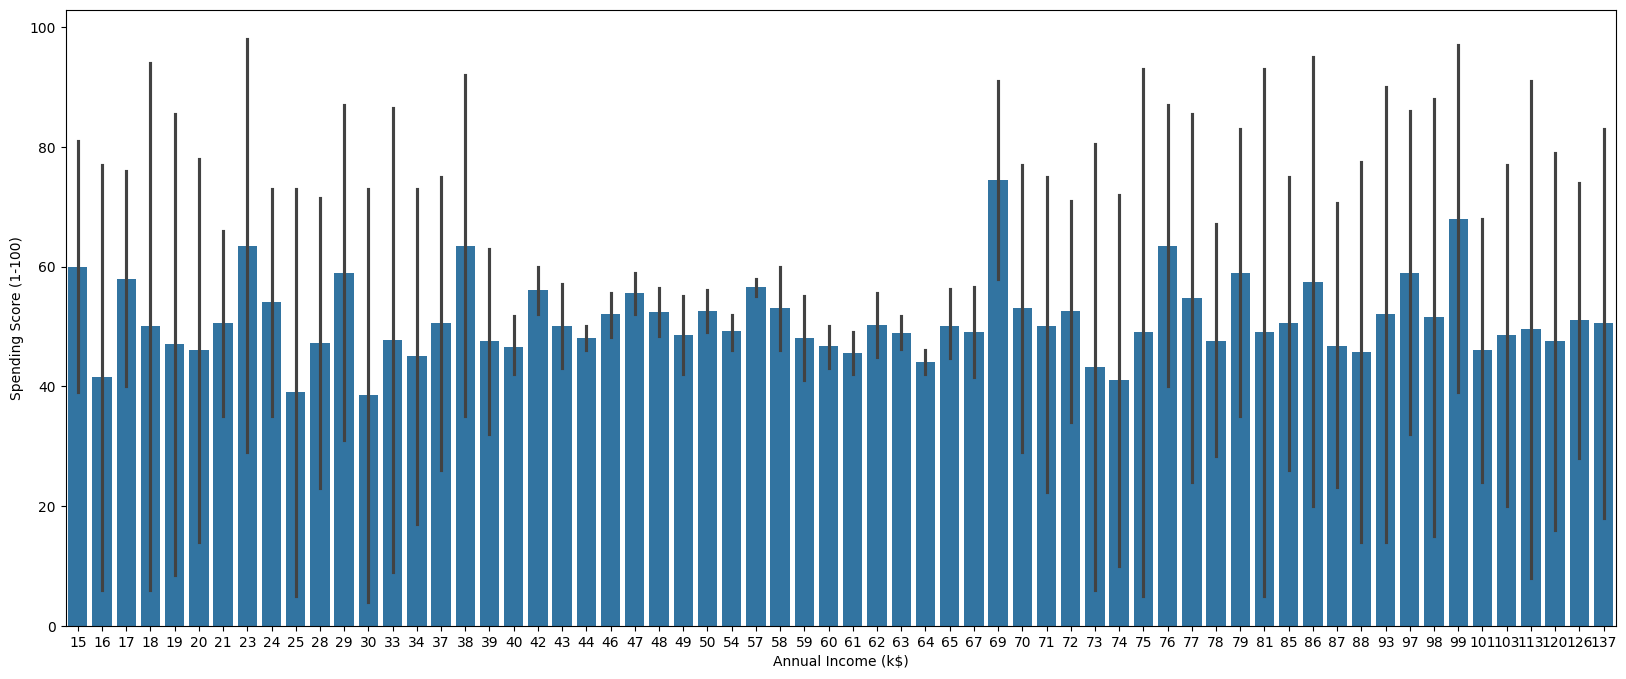

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Final_df)


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

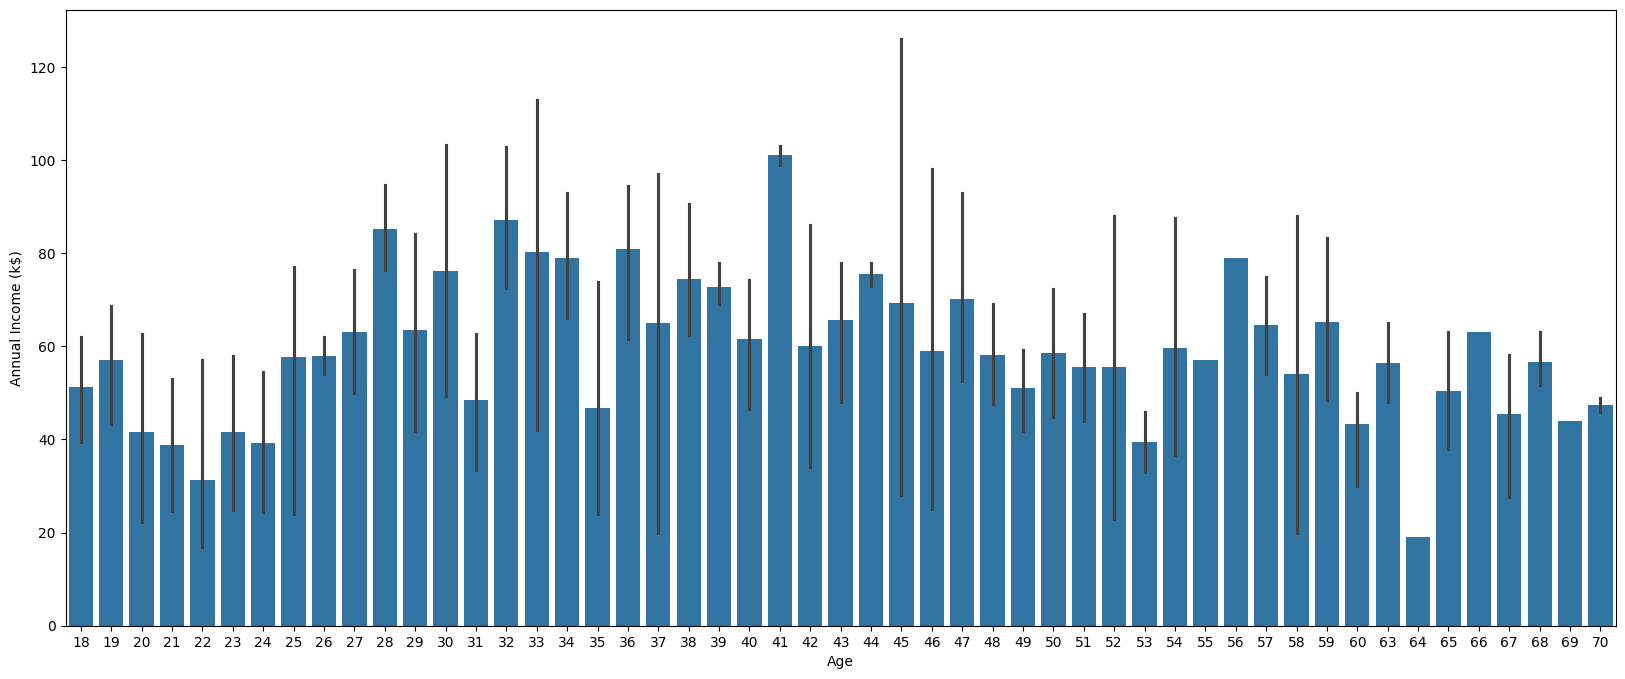

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(x='Age',y='Annual Income (k$)',data=Final_df)

In [31]:
#scaling feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(Final_df)
scaled_x

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.49824268, -1.06573534, -1.5

In [34]:
#creating k model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
cluster_labels= model.fit_predict(scaled_x)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [35]:
len(scaled_x)
len(cluster_labels)
Final_df['Cluster']=cluster_labels


<Axes: >

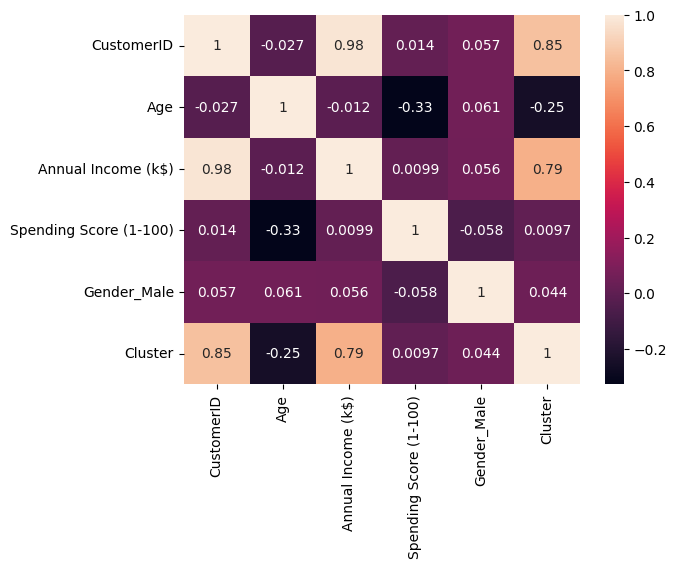

In [36]:
sns.heatmap(Final_df.corr(), annot=True)

In [37]:
Final_df.corr()['Cluster'].sort_values()

,Cluster
Age,-0.254193
Spending Score (1-100),0.009718
Gender_Male,0.044376
Annual Income (k$),0.793695
CustomerID,0.852640
Cluster,1.000000


<Axes: >

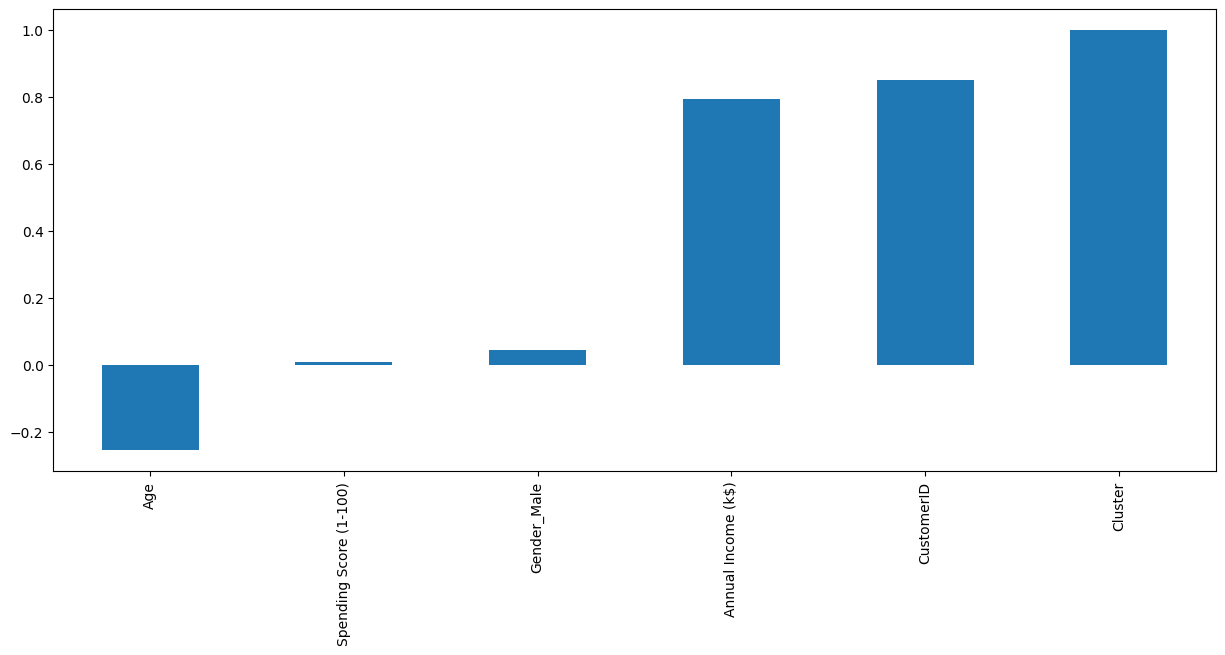

In [38]:
plt.figure(figsize=(15,6))
Final_df.corr()['Cluster'].sort_values().plot(kind='bar')

In [40]:
#Choosing K value
ssd= []

for k in range (2, 10):
    model=KMeans(n_clusters=k)

    model.fit(scaled_x)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

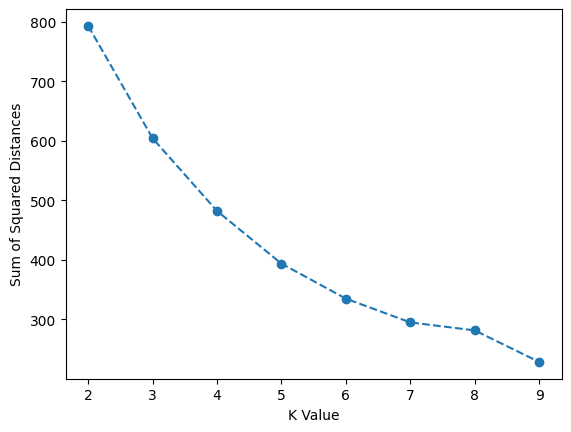

In [41]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

In [44]:
pd.Series(ssd).diff()


,0
0,NaN
1,-188.902388
2,-122.136766
3,-88.539417
4,-58.814692
5,-40.003839
6,-13.407242
7,-53.001930


<Axes: >

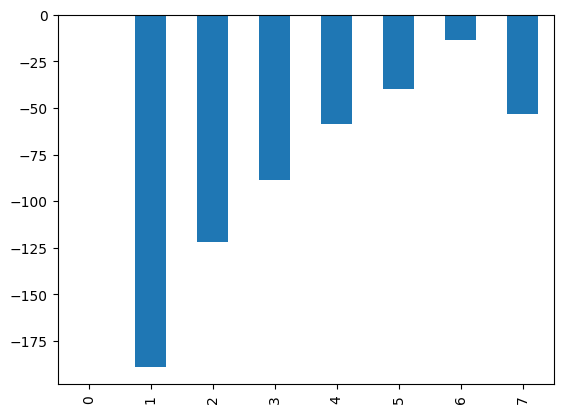

In [45]:
pd.Series(ssd).diff().plot(kind='bar')



In [46]:
new_model = KMeans(n_clusters=5)
new_cluster_labels= new_model.fit_predict(scaled_x)
new_cluster_labels

array([4, 4, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 4, 4, 3, 4, 1, 3, 4, 4,
       1, 4, 1, 4, 1, 4, 3, 3, 1, 3, 1, 4, 1, 3, 1, 3, 3, 3, 1, 4, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 4,
       3, 1, 4, 3, 1, 1, 1, 1, 1, 4, 1, 4, 3, 1, 1, 4, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 4, 1, 3, 3, 4, 1, 3, 1, 4, 3, 1, 1, 4, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 4, 3, 3, 1, 1, 1, 1, 4, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [56]:
Final_df['Cluster']=new_cluster_labels
X = Final_df.iloc[:,[2,3]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [53]:
y= new_model.fit_predict(X)


In [54]:
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

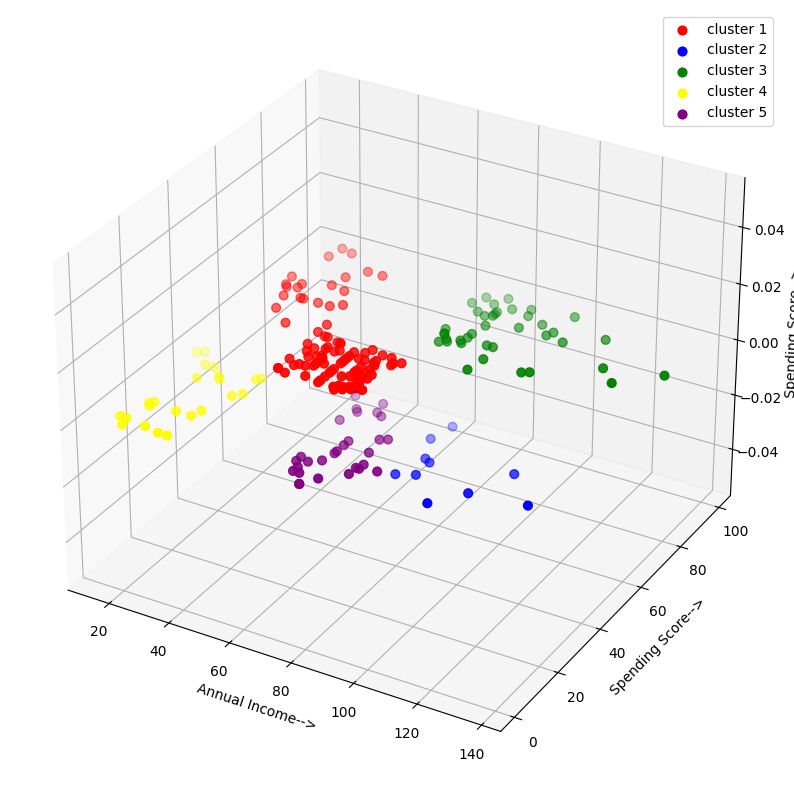

In [57]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0],X[y == 0,1], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X[y == 1,0],X[y == 1,1], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X[y == 2,0],X[y == 2,1], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X[y == 3,0],X[y == 3,1], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X[y == 4,0],X[y == 4,1], s = 40 , color = 'purple', label = "cluster 5")
ax.set_xlabel('Annual Income-->')
ax.set_ylabel('Spending Score-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

In [58]:
#As you see k=5 is a good choice for clustering
#Cluster 2 are people aged less than 40 with very high annual incomes, them having a high spending score makes sense. So, to keep this going on, these people could be given better offers to attract them.
#Cluster 2 & 4 are the best choice to attract them with offers to buy from the mall

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
mall_df=pd.read_csv("Mall_Customers (1).csv")
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

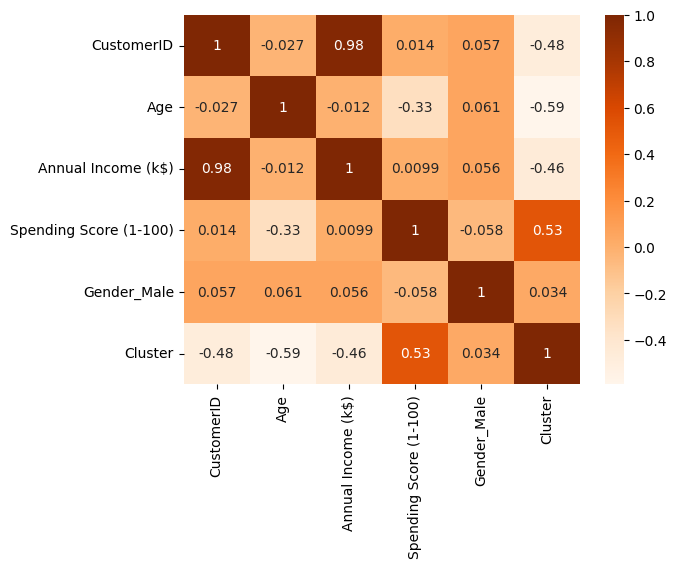

In [65]:
sns.heatmap(Final_df.corr() , annot=True,cmap='Oranges')

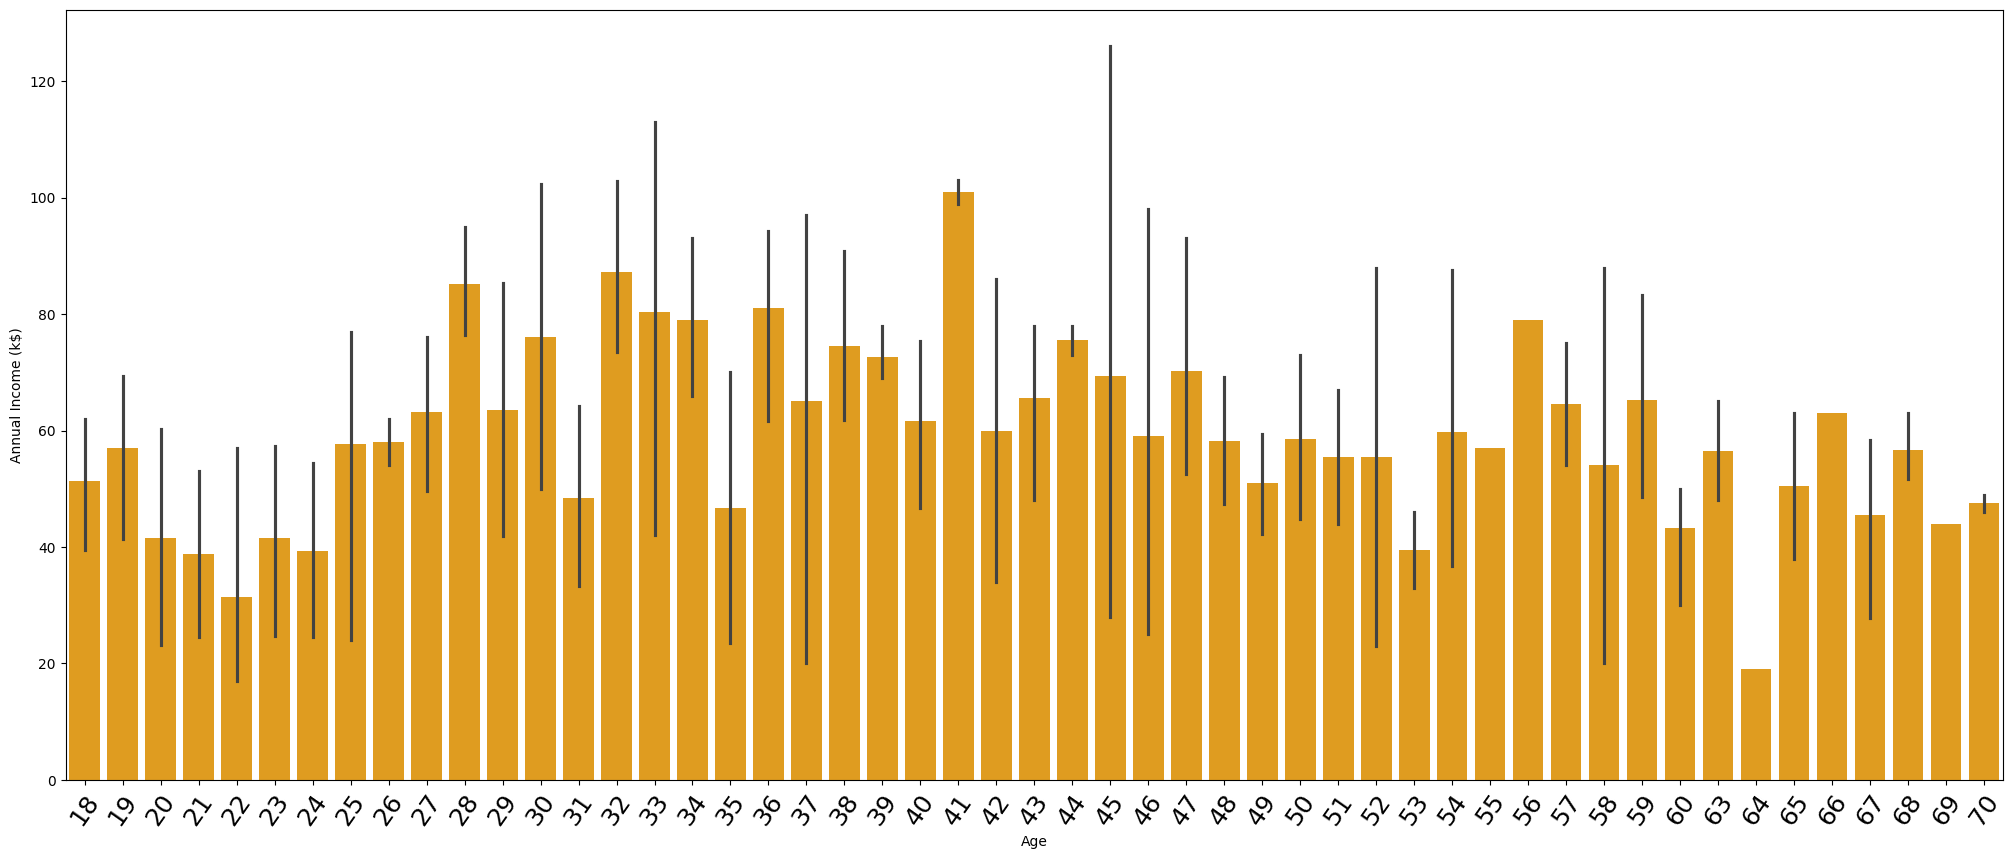

In [67]:
plt.figure(figsize=(25,10))
p=sns.barplot(x='Age',y='Annual Income (k$)',data=mall_df,color='orange')
plt.xticks(rotation=55,fontsize = 18)

plt.show()

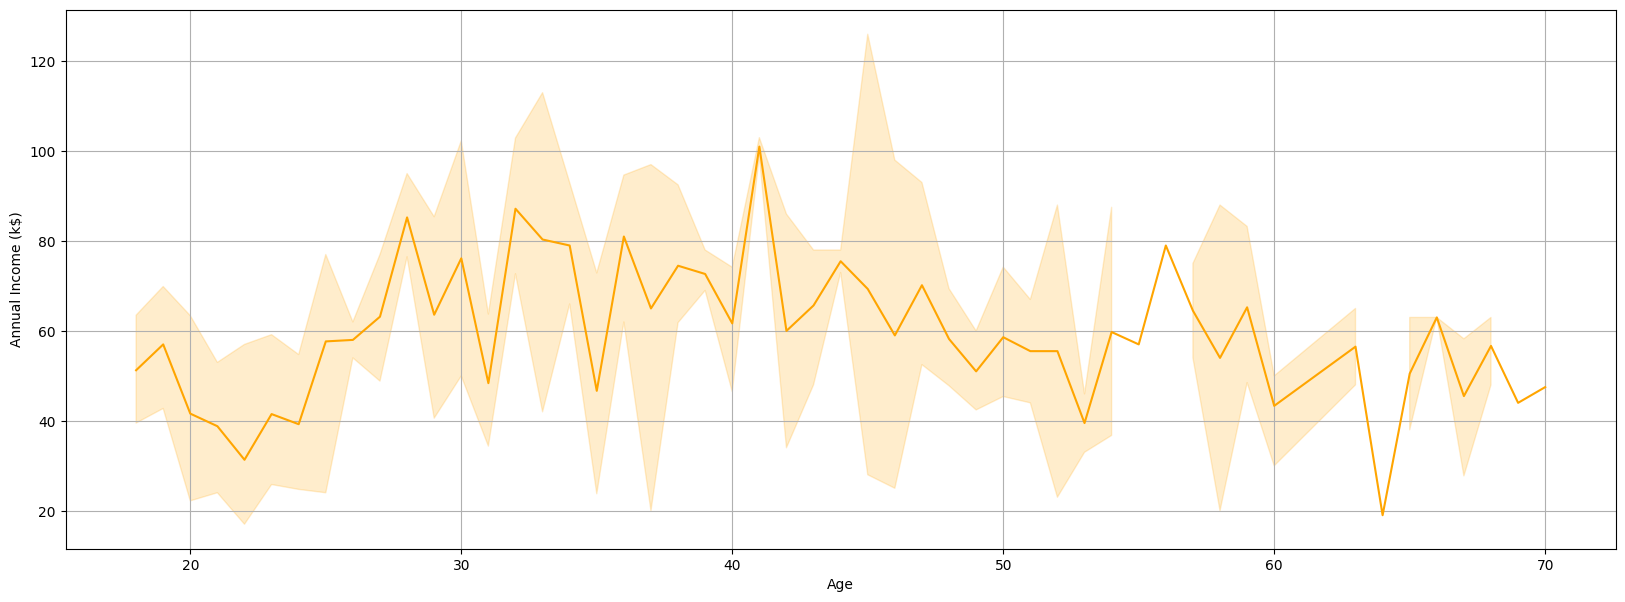

In [68]:
plt.figure(figsize=(20,7))
plt.grid(True)

sns.lineplot(data=mall_df, x='Age',y='Annual Income (k$)',color="orange")
plt.show()

/tmp/ipython-input-1329230856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mall_df,x='Gender',palette='Oranges')


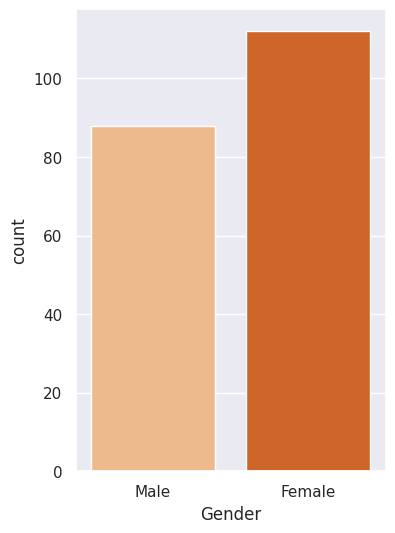

In [69]:
plt.figure(figsize=(4,6))
sns.set(font_scale =1)

sns.countplot(data=mall_df,x='Gender',palette='Oranges')
plt.show()

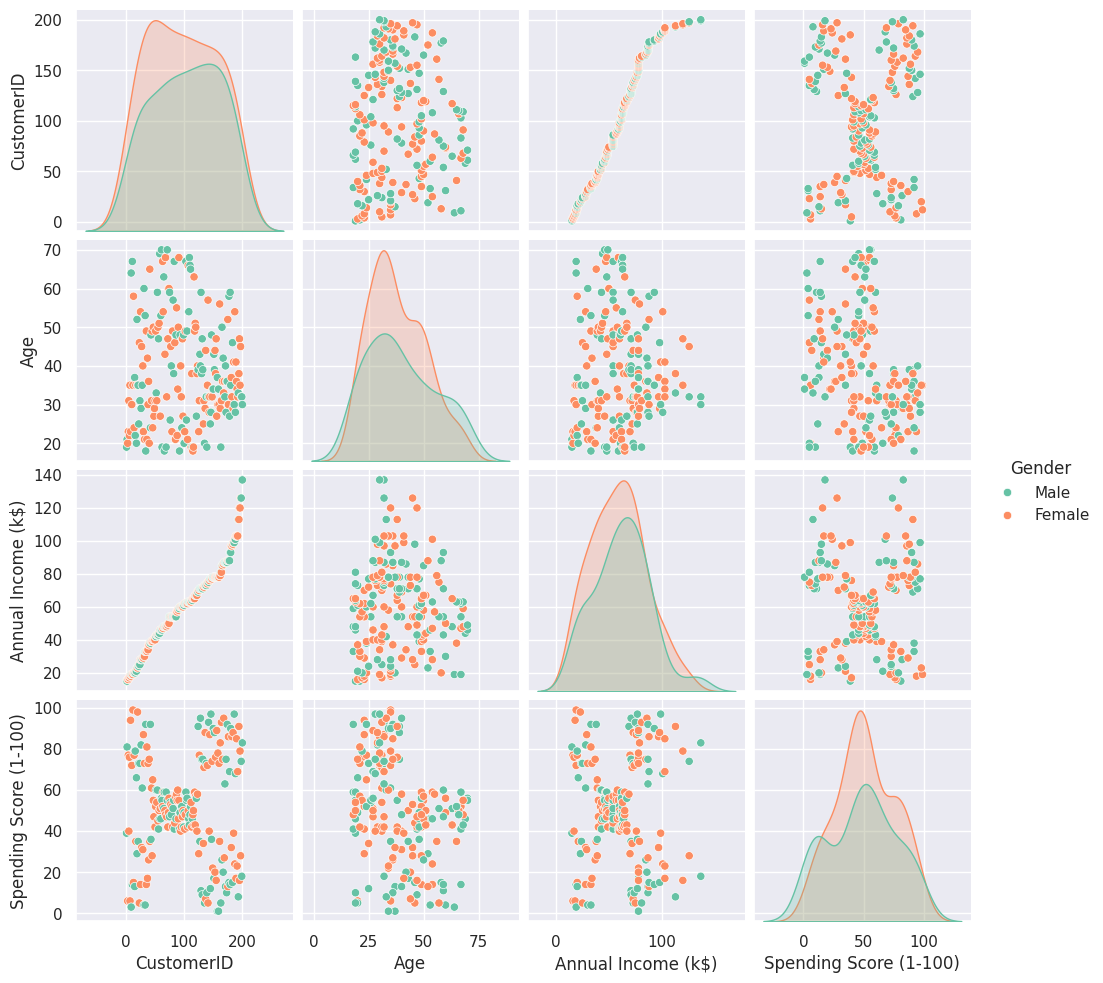

In [70]:
sns.pairplot(mall_df, hue= 'Gender',palette='Set2')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

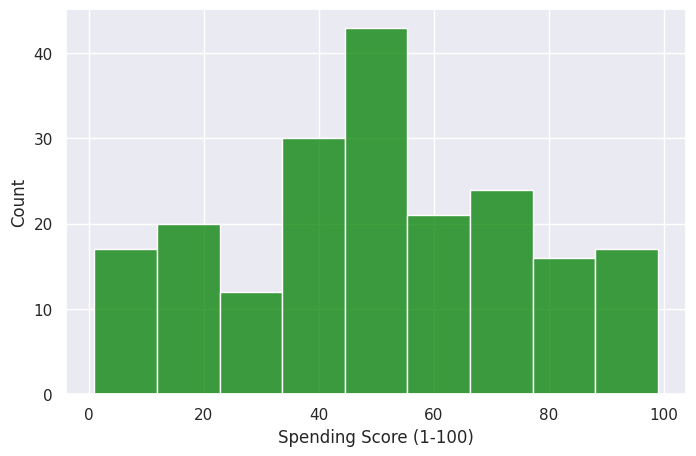

In [100]:
plt.figure(figsize=(8, 5))
sns.histplot(data=mall_df, x='Spending Score (1-100)',color='green')

In [72]:
mall_df.select_dtypes(include='object').columns

Index(['Gender'], dtype='object')

In [73]:
gender = {'Male': 0,'Female': 1}
mall_df.Gender = [gender[item] for item in mall_df.Gender]
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [74]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [75]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

In [76]:
mall_df.drop('CustomerID' , axis=1,inplace=True)


In [77]:
scaler=StandardScaler()

In [78]:
scaled_X=scaler.fit_transform(mall_df)

In [79]:
from sklearn.cluster import KMeans

In [80]:
model=KMeans(n_clusters=2)

In [81]:
cluster_labels=model.fit_predict(scaled_X)

In [82]:
cluster_labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [84]:
len(scaled_X)

200

In [85]:
mall_df['Cluster']=cluster_labels

<Axes: >

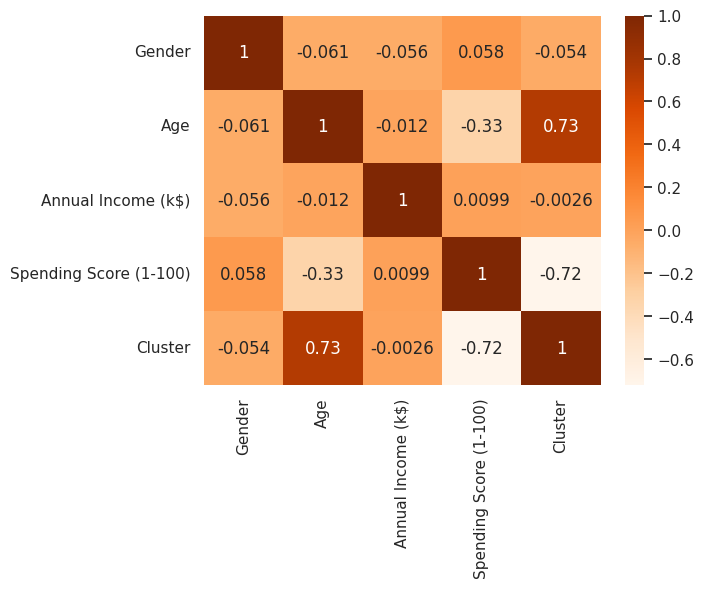

In [101]:
sns.heatmap(mall_df.corr(),annot=True,cmap='Orange')

In [87]:
mall_df.corr()['Cluster'].sort_values()

,Cluster
Spending Score (1-100),-0.720697
Gender,-0.054014
Annual Income (k$),-0.002551
Age,0.730519
Cluster,1.000000


<Axes: >

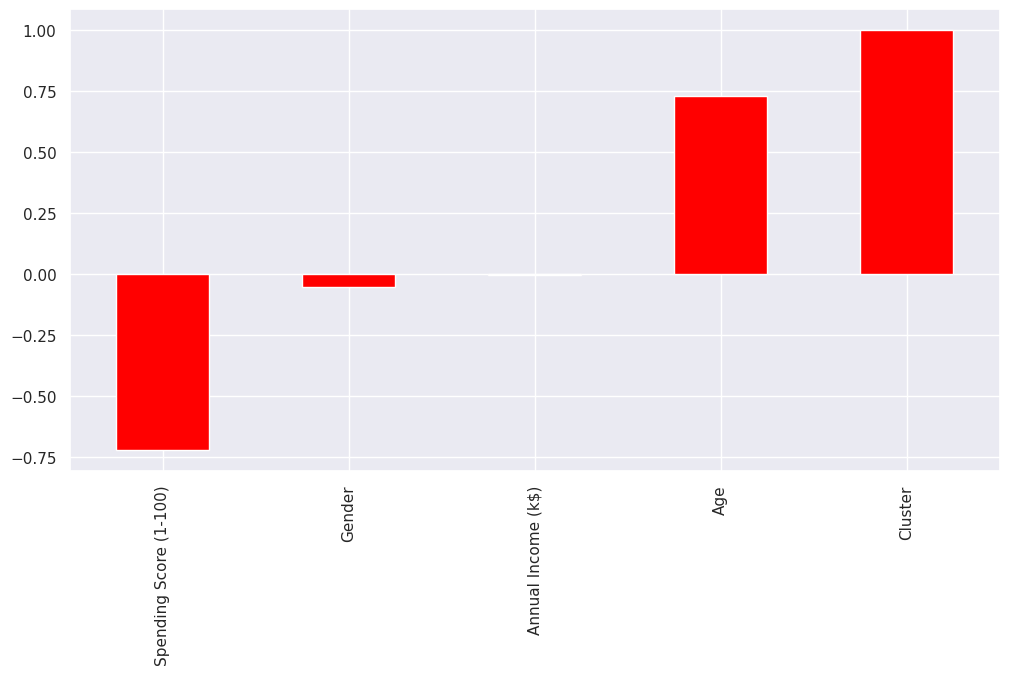

In [94]:
plt.figure(figsize=(12,6))
mall_df.corr()['Cluster'].sort_values().plot(kind='bar',color='red')

In [89]:
#Choosing K Value
ssd=[]

for k in range(2,10):
    model=KMeans(n_clusters=k)

    model.fit(scaled_X)
    ssd.append(model.inertia_)
ssd

[588.8026767824932,
 476.78755441351575,
 389.9240329581931,
 332.25262846982906,
 287.53640184807097,
 235.5616425756366,
 199.86609469828645,
 197.01510251378215]

Text(0, 0.5, 'Sum of Squred Distances')

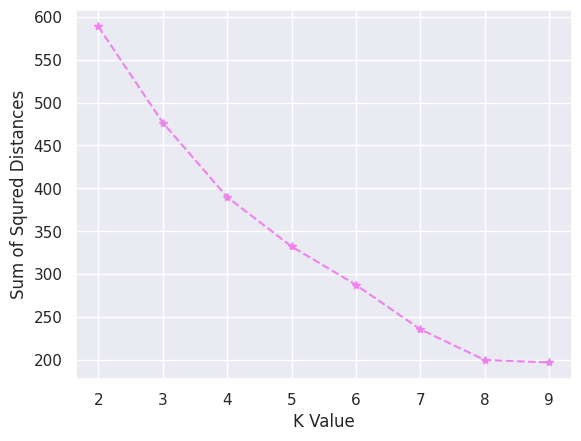

In [102]:
plt.plot(range(2,10), ssd, '*--',color='violet')
plt.xlabel('K Value')
plt.ylabel('Sum of Squred Distances')

In [103]:
pd.Series(ssd).diff()

,0
0,NaN
1,-112.015122
2,-86.863521
3,-57.671404
4,-44.716227
5,-51.974759
6,-35.695548
7,-2.850992


<Axes: >

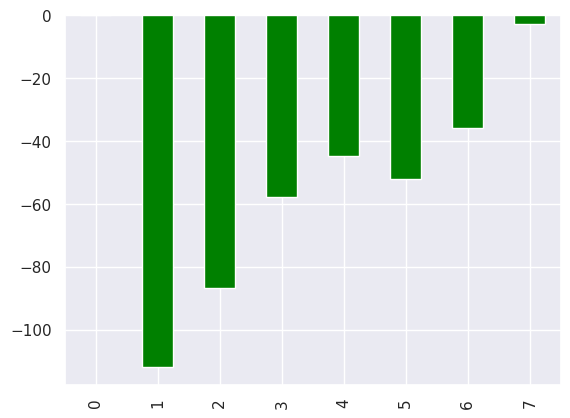

In [104]:
pd.Series(ssd).diff().plot(kind='bar',color='green  ')

In [105]:
new_model = KMeans(n_clusters=5)
new_cluster_labels= new_model.fit_predict(scaled_X)

In [108]:
mall_df['Cluster']=new_cluster_labels
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,4
3,1,23,16,77,4
4,1,31,17,40,4


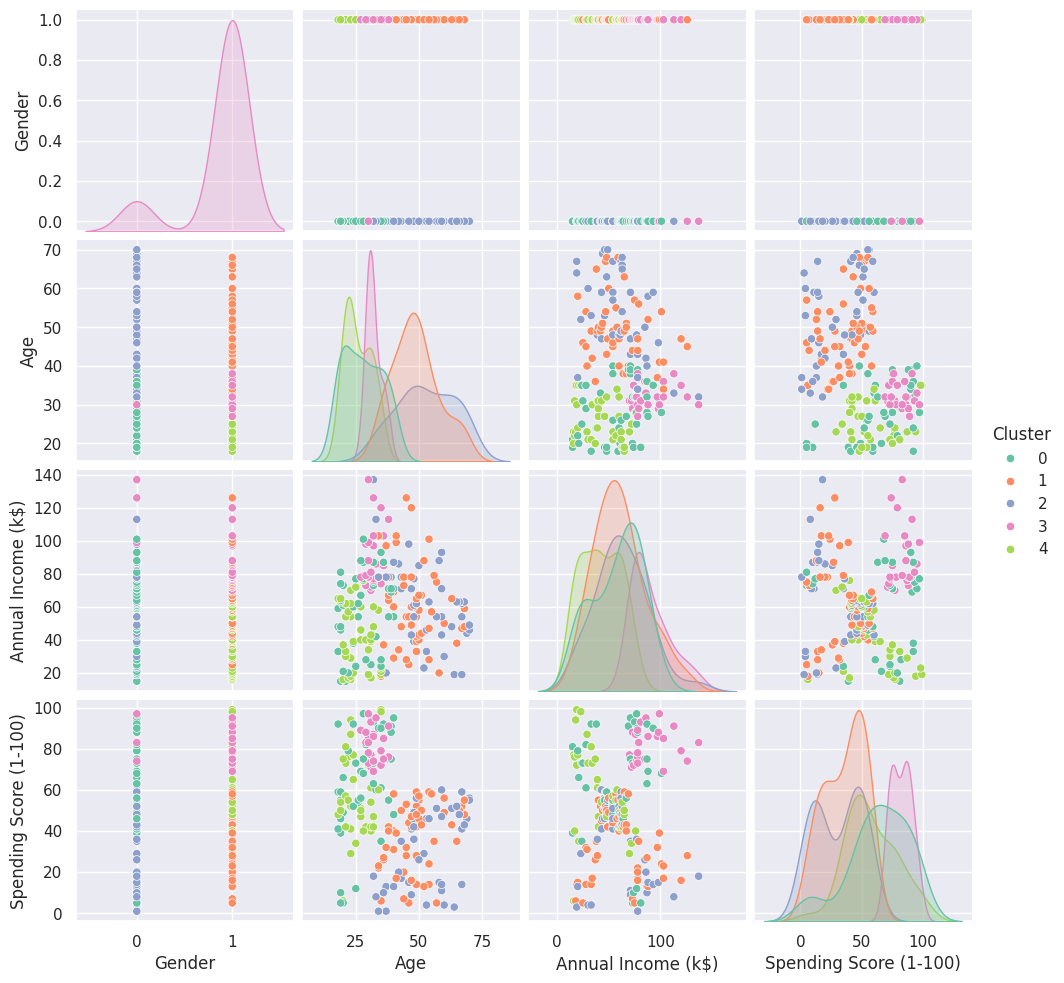

In [109]:
sns.pairplot(mall_df,hue='Cluster',palette='Set2')